# Tutorial 1: Calculating a Basic Sea Level Fingerprint

Welcome to the first tutorial for `pyslfp`!

A **sea-level "fingerprint"** is the unique, spatially variable pattern of sea-level change that results from the melting of a specific ice sheet or glacier. When an ice sheet loses mass, the water doesn't raise the sea level uniformly across the globe like adding water to a bathtub. Instead, a complex pattern emerges due to several key physical effects:

* **Gravitational Changes:** A large ice sheet exerts a significant gravitational pull on the surrounding water, pulling the sea level up locally. When the ice melts, this pull vanishes, causing the sea level to *fall* near the former ice sheet.
* **Elastic Rebound:** The Earth's crust, which was depressed by the weight of the ice, elastically rebounds upwards after the ice is removed. This solid Earth motion further contributes to the sea-level fall in the near field.
* **Rotational Changes:** The redistribution of mass from the pole to the global oceans slightly alters the Earth's rotation, which also has a distinct pattern of sea-level change.

This tutorial will guide you through the process of calculating and plotting a classic sea-level fingerprint for a hypothetical scenario: the partial melting of the Northern Hemisphere's ice sheets.

## Setup: Importing Necessary Libraries

First, we need to import the necessary libraries:
- `pyslfp`: The main library that provides most of the functionality we need. 
- `matplotlib`: For customising our final plots. 

In [1]:
import matplotlib.pyplot as plt
import pyslfp as sl

## Step 1: Initialise the Fingerprint Model

The first step is to create an instance of the `FingerPrint` class. This object will hold our model's parameters and provide the methods for our calculations.

The most important parameter here is `lmax`, which sets the **maximum spherical harmonic degree**. This controls the spatial resolution of our global model. A higher `lmax` allows for more detailed features but increases computational cost. For a global-scale problem like this, `lmax=256` provides a good balance of detail and performance; this value is also the default if `lmax` is not provided. 

In [2]:
# lmax sets the spherical harmonic resolution.
fp = sl.FingerPrint(lmax=256)

## Step 2: Set the Background State

The sea-level equation depends on the present-day geometry of the Earth—specifically, where the oceans are. This is known as the "ocean function."

We use the `set_state_from_ice_ng` method to load a standard, realistic background state.
* `version=sl.IceModel.ICE7G`: We specify the ICE-7G model, a widely used reconstruction of global ice history.
* `date=0.0`: We set the date to 0.0 ka (thousands of years before present), which corresponds to the present day.

This configures our `FingerPrint` object with the correct distribution of oceans, land, and existing ice sheets.

In [4]:
# This uses the built-in ICE-7G model loader to set the present-day
# distribution of ice and sea level.
fp.set_state_from_ice_ng(version=sl.IceModel.ICE7G, date=0.0)

## Step 3: Define a Surface Mass Load

Next, we need to define the "forcing"—the change in surface mass that will cause the sea level to change. In this library, this is called a **direct load**. It represents the redistribution of mass on the planet's surface.

We'll use the convenient `northern_hemisphere_load` method to simulate the effect of melting **10%** of the modern Northern Hemisphere's ice mass. This method calculates the mass removed from the Greenland and other Arctic ice sheets. 

In [5]:
# This function calculates the load corresponding to melting 10% of
# the Northern Hemisphere's ice mass.
direct_load = fp.northern_hemisphere_load(fraction=0.1)

## Step 4: Solve the Sea Level Equation

With the model initialized and the load defined, we can now solve the sea-level equation. This is as simple as calling our `FingerPrint` object like a function.

The solver iteratively computes the gravitationally self-consistent sea-level pattern that results from the load. It returns a tuple containing four physical fields:
1.  `sea_level_change`: The change in the sea surface height (in meters).
2.  `displacement`: The vertical displacement of the solid Earth's surface.
3.  `gravity_potential_change`: The change in the Earth's gravity potential, this being the sum of gravitational and centrifugal contributions. 
4.  `angular_velocity_change`: The change in the Earth's angular velocity vector.

For this tutorial, we are only interested in the first field, `sea_level_change`. We use `_` as a placeholder for the other outputs that we won't be using.

In [8]:
# The __call__ method returns four fields. We use the underscore `_` as a
# conventional placeholder for the values we don't intend to use.
sea_level_change, _, _, _ = fp(direct_load=direct_load)

## Step 5: Plot the Fingerprint

Finally, let's visualize the result. We use the library's built-in `plot` function, which is a wrapper around `matplotlib` and `cartopy`.

In this instance, we choose to multiply our `sea_level_change` grid by `fp.ocean_projection()`. This is a helper that creates a mask that is `1.0` over the oceans and `NaN` (Not a Number) over land. In this manner, we emphasise the non-uniform spatial variations in sea level within the oceans. 

We then add a title and a colorbar to make the plot clear and informative.

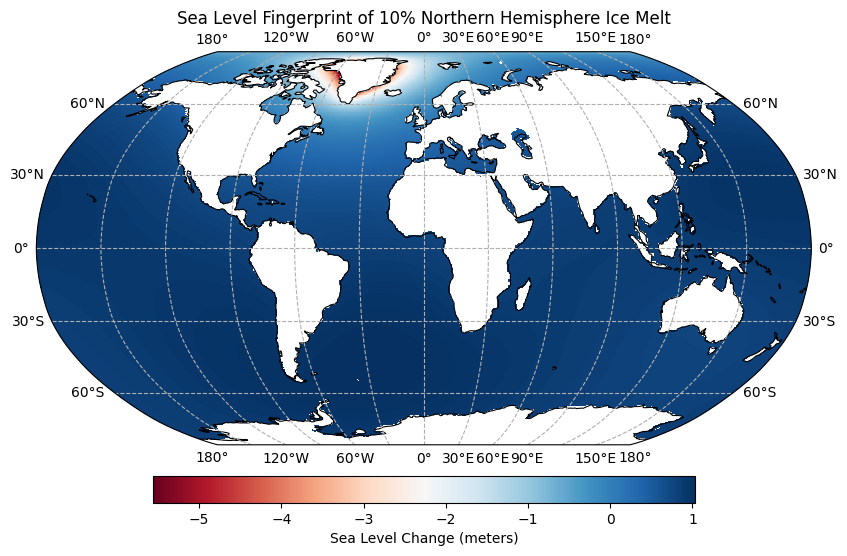

In [9]:
# We use the ocean_projection() method to create a mask, ensuring we only plot
# the sea-level change over the oceans.
fig, ax, im = sl.plot(
    sea_level_change * fp.ocean_projection(),
    coasts=True,        
)

# Customize the plot
ax.set_title("Sea Level Fingerprint of 10% Northern Hemisphere Ice Melt", y=1.05)
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", pad=0.05, shrink=0.7)
cbar.set_label("Sea Level Change (meters)")

plt.show()

## Interpreting the Results

The resulting plot clearly shows the key features of a sea-level fingerprint:

* **Near-Field Sea-Level Fall (Red Regions):** Notice the significant fall in sea level around Greenland and the Canadian Arctic. This is the direct result of the reduced gravitational pull from the now-diminished ice sheets.
* **Far-Field Amplification (Blue Regions):** In the Southern Hemisphere, particularly the South Pacific and South Atlantic, the sea-level rise is substantially *greater* than the global average. These regions are effectively "dumping grounds" for the meltwater.
* **Transitional Zone:** Between the near-field and far-field, there is a boundary where the sea-level change is close to the global average.

This concludes our first tutorial. You have successfully calculated a sea-level fingerprint, demonstrating how changes in land ice produce a complex and highly non-uniform pattern of sea-level change across the globe.

## Further Reading

For those interested in the scientific background of sea-level fingerprinting and the theory behind the sea-level equation, the following papers are seminal works in the field. The `pyslfp` library is a numerical implementation of the theories described in these and other related publications.

* **The Foundational Paper:**
    > Farrell, W. E., & Clark, J. A. (1976). On postglacial sea level. *Geophysical Journal of the Royal Astronomical Society*, 46(3), 647-667.
    >
    > This is the classic paper that first laid out the complete "sea-level equation," providing a comprehensive theory for gravitationally self-consistent sea-level changes on a deformable Earth.

* **A Modern Theoretical Review:**
    > Mitrovica, J. X., & Milne, G. A. (2003). On post-glacial sea level: I. General theory. *Geophysical Journal International*, 154(2), 253-267.
    >
    > This paper provides a thorough and modern review of the theory, reformulating the classic sea-level equation. It is an essential resource for students and researchers looking to understand the detailed physics in a more current context.

* **A Classic Application to Paleoclimate:**
    > Clark, P. U., Mitrovica, J. X., Milne, G. A., & Tamisiea, M. E. (2002). Sea-level fingerprinting of the Antarctic meltwater pulse. *Science*, 295(5564), 2438-2441.
    >
    > This paper shows how the fingerprinting technique is applied to solve major scientific questions. By comparing geological sea-level records with theoretical fingerprints, the authors argued that the massive "Meltwater Pulse 1A" event (~14,500 years ago) likely originated from Antarctica, a conclusion with major implications for understanding ice sheet stability.